# Pokémon EDA

This notebook explores Pokémon data, found [here](https://www.kaggle.com/datasets/jgassdfe/pokemon-dataset-of-gen-1-gen-9).

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
pokemon_df = pd.read_csv('pokemon_data.csv')
pd.set_option('display.max_columns', None)

# Clean data

Convert column names to snake case.

In [127]:
def snake_case(text):
    snake_cased = []
    for i, char in enumerate(text):
        if char.isupper():
            snake_cased.append(char.lower())
        elif char == ' ':
            if snake_cased and snake_cased[-1] != '_':
                snake_cased.append('_')
        else:
            snake_cased.append(char)
    
    return ''.join(snake_cased)

In [128]:
pokemon_df.columns = [snake_case(col) for col in pokemon_df.columns]
pokemon_df.head()

,id,name,hp,attack,defense,sp._attack,sp._defense,speed,base_stats,normal_weakness,fire_weakness,water_weakness,electric_weakness,grass_weakness,ice_weakness,fighting_weakness,poison_weakness,ground_weakness,flying_weakness,psychic_weakness,bug_weakness,rock_weakness,ghost_weakness,dragon_weakness,dark_weakness,steel_weakness,fairy_weakness,height_inches,height_meters,weight_pounds,weight_kilograms,capturing_rate,gender_male_ratio,egg_steps,egg_cycles,abilities,type_1,type_2,classification_info,forms,gen,is_legendary,is_mythical,is_ultra_beast,number_immune,number_not_effective,number_normal,number_super_effective
0,1,Bulbasaur,45,49,49,65,65,45,318,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,204,0.7,15.2,6.9,45,88.1,5120,45,Chlorophyll; Overgrow,Grass,Poison,Seed,NaN,1,0,0,0,0,5,9,4
1,2,Ivysaur,60,62,63,80,80,60,405,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,303,1.0,28.7,13.0,45,88.1,5120,45,Chlorophyll; Overgrow,Grass,Poison,Seed,NaN,1,0,0,0,0,5,9,4
2,3,Venusaur,80,82,83,100,100,80,525,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,607,2.0,220.5,100.0,45,88.1,5120,45,Chlorophyll; Overgrow,Grass,Poison,Seed,Mega Venusaur,1,0,0,0,0,5,9,4
3,4,Charmander,39,52,43,60,50,65,309,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,200,0.6,18.7,8.5,45,88.1,5120,45,Blaze; Solar Power,Fire,NaN,Lizard,NaN,1,0,0,0,0,6,9,3
4,5,Charmeleon,58,64,58,80,65,80,405,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,307,1.1,41.9,19.0,45,88.1,5120,45,Blaze; Solar Power,Fire,NaN,Flame,NaN,1,0,0,0,0,6,9,3


# Insights

### What is the relationship between attack and speed?

Text(0.5, 1.0, 'Pokémon Attack, Speed Relationship')

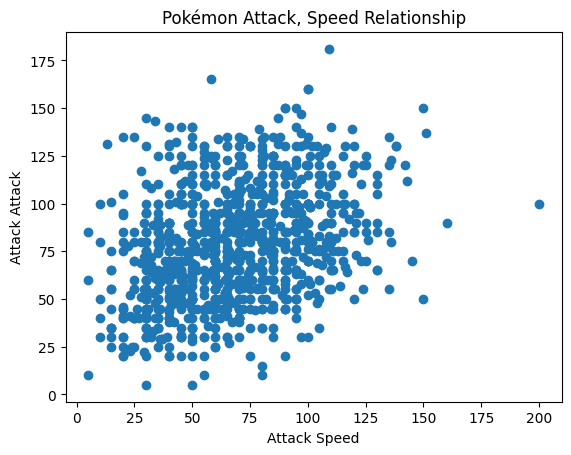

In [129]:
x = pokemon_df['speed']
y = pokemon_df['attack']

plt.scatter(x, y)
plt.xlabel('Attack Speed')
plt.ylabel('Attack Attack')
plt.title('Pokémon Attack, Speed Relationship')

In [130]:
correlation = x.corr(y)
print(correlation)

0.3523039164681193


### What's the relationship between weight and attack?

Text(0.5, 1.0, 'Pokémon Weight, Attack Relationship')

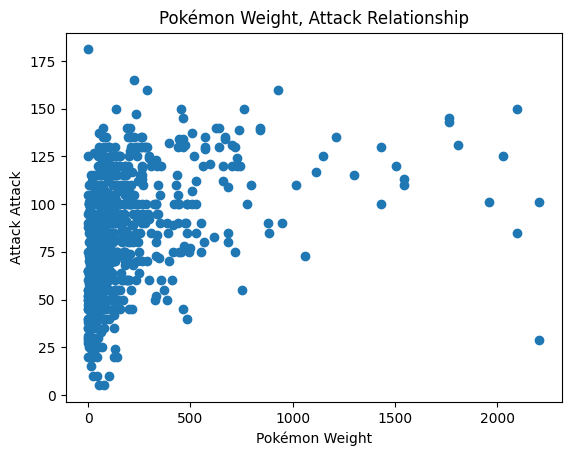

In [131]:
x = pokemon_df['weight_pounds']
y = pokemon_df['attack']

plt.scatter(x, y)
plt.xlabel('Pokémon Weight')
plt.ylabel('Attack Attack')
plt.title('Pokémon Weight, Attack Relationship')

In [132]:
strongest = pokemon_df[pokemon_df['attack'] == pokemon_df['attack'].max()]
print(strongest['name'])

797    Kartana
Name: name, dtype: object


## What portion of Pokémon are legendary?

In [133]:
legendary = pokemon_df[pokemon_df['is_legendary'] == 1]
print(f'There are {len(legendary)} legendary Pokémon: ')
print(legendary['name'].to_string())

There are 64 legendary Pokémon: 
143        Articuno
144          Zapdos
145         Moltres
149          Mewtwo
242          Raikou
243           Entei
244         Suicune
248           Lugia
249           Ho-Oh
376        Regirock
377          Regice
378       Registeel
379          Latias
380          Latios
381          Kyogre
382         Groudon
383        Rayquaza
479            Uxie
480         Mesprit
481           Azelf
482          Dialga
483          Palkia
484         Heatran
485       Regigigas
486        Giratina
487       Cresselia
637        Cobalion
638       Terrakion
639        Virizion
640        Tornadus
641       Thundurus
642        Reshiram
643          Zekrom
644        Landorus
645          Kyurem
715         Xerneas
716         Yveltal
717         Zygarde
772        Silvally
788          Cosmog
789         Cosmoem
790        Solgaleo
791          Lunala
799        Necrozma
887          Zacian
888       Zamazenta
889       Eternatus
890           Kubfu
891    

### Pie chart representation of Pokémon types

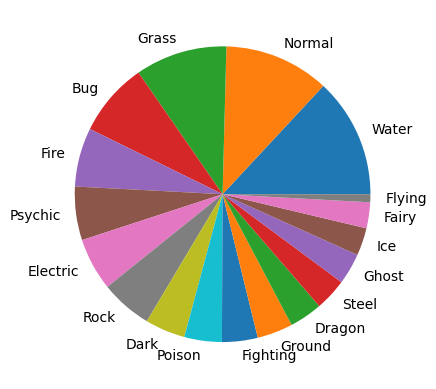

In [134]:
types = pokemon_df['type_1'].value_counts().plot.pie()
plt.ylabel('')
plt.show()

# Logistic Regression

Below, we will explore how well certain features serve target predictors.

## Import

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Overview

In [136]:
pokemon_df.head()

,id,name,hp,attack,defense,sp._attack,sp._defense,speed,base_stats,normal_weakness,fire_weakness,water_weakness,electric_weakness,grass_weakness,ice_weakness,fighting_weakness,poison_weakness,ground_weakness,flying_weakness,psychic_weakness,bug_weakness,rock_weakness,ghost_weakness,dragon_weakness,dark_weakness,steel_weakness,fairy_weakness,height_inches,height_meters,weight_pounds,weight_kilograms,capturing_rate,gender_male_ratio,egg_steps,egg_cycles,abilities,type_1,type_2,classification_info,forms,gen,is_legendary,is_mythical,is_ultra_beast,number_immune,number_not_effective,number_normal,number_super_effective
0,1,Bulbasaur,45,49,49,65,65,45,318,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,204,0.7,15.2,6.9,45,88.1,5120,45,Chlorophyll; Overgrow,Grass,Poison,Seed,NaN,1,0,0,0,0,5,9,4
1,2,Ivysaur,60,62,63,80,80,60,405,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,303,1.0,28.7,13.0,45,88.1,5120,45,Chlorophyll; Overgrow,Grass,Poison,Seed,NaN,1,0,0,0,0,5,9,4
2,3,Venusaur,80,82,83,100,100,80,525,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,607,2.0,220.5,100.0,45,88.1,5120,45,Chlorophyll; Overgrow,Grass,Poison,Seed,Mega Venusaur,1,0,0,0,0,5,9,4
3,4,Charmander,39,52,43,60,50,65,309,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,200,0.6,18.7,8.5,45,88.1,5120,45,Blaze; Solar Power,Fire,NaN,Lizard,NaN,1,0,0,0,0,6,9,3
4,5,Charmeleon,58,64,58,80,65,80,405,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,307,1.1,41.9,19.0,45,88.1,5120,45,Blaze; Solar Power,Fire,NaN,Flame,NaN,1,0,0,0,0,6,9,3


## Summary

In [137]:
pokemon_df.describe()

,id,hp,attack,defense,sp._attack,sp._defense,speed,base_stats,normal_weakness,fire_weakness,water_weakness,electric_weakness,grass_weakness,ice_weakness,fighting_weakness,poison_weakness,ground_weakness,flying_weakness,psychic_weakness,bug_weakness,rock_weakness,ghost_weakness,dragon_weakness,dark_weakness,steel_weakness,fairy_weakness,height_inches,height_meters,weight_pounds,weight_kilograms,capturing_rate,gender_male_ratio,egg_steps,egg_cycles,gen,is_legendary,is_mythical,is_ultra_beast,number_immune,number_not_effective,number_normal,number_super_effective
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,870.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,513.000000,70.184390,77.541463,72.526829,70.080976,70.225366,67.186341,427.560976,0.872439,1.137317,1.051463,1.044146,1.005366,1.203659,1.071220,0.971220,1.140488,1.186341,1.000000,1.007561,1.230732,0.996098,0.975610,1.057073,0.986585,1.092683,344.809756,1.234829,146.825171,66.696976,94.987317,20.568161,6705.326829,97.675122,4.741463,0.062439,0.022439,0.010732,0.627317,3.900488,10.213659,3.258537
std,296.036315,26.631054,29.813654,29.325282,29.658378,26.686785,28.717227,112.878938,0.283858,0.677473,0.598132,0.633200,0.747943,0.735653,0.726555,0.550569,0.770802,0.599201,0.519164,0.632671,0.684159,0.557254,0.375508,0.448425,0.496942,0.545597,404.280712,1.498830,265.754400,121.056998,76.384160,29.947252,6434.958002,83.459634,2.633633,0.242069,0.148179,0.103087,0.744534,2.198155,3.051992,1.478521
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,4.000000,0.100000,0.200000,0.100000,3.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,257.000000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,323.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,108.000000,0.500000,18.700000,8.500000,45.000000,5.000000,3840.000000,45.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,2.000000
50%,513.000000,68.000000,75.000000,70.000000,65.000000,67.000000,65.000000,450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,303.000000,1.000000,61.700000,28.000000,60.000000,5.000000,5120.000000,60.000000,5.000000,0.000000,0.000000,0.000000,0.000000,4.000000,11.000000,3.000000
75%,769.000000,85.000000,100.000000,90.000000,90.000000,86.000000,88.000000,508.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,411.000000,1.500000,154.300000,70.000000,140.000000,10.000000,5120.000000,150.000000,7.000000,0.000000,0.000000,0.000000,1.000000,5.000000,12.000000,4.000000
max,1025.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,6507.000000,28.000000,2204.400000,999.900000,255.000000,88.140000,30720.000000,710.000000,9.000000,1.000000,1.000000,1.000000,3.000000,11.000000,16.000000,7.000000


## Isolate relevant features

In [138]:
selected_features = ['speed', 'defense']
features_df = pokemon_df[selected_features]
features_df

,speed,defense
0,45,49
1,60,63
2,80,83
3,65,43
4,80,58
...,...,...
1020,75,91
1021,124,80
1022,98,100
1023,60,85


## Feature Engineering

The median speed is 65.

In [139]:
features_df = features_df.copy()
median_defense = features_df['defense'].median()
features_df['high_defense'] = (features_df['defense'] > median_defense).astype(int)
features_df

,speed,defense,high_defense
0,45,49,0
1,60,63,0
2,80,83,1
3,65,43,0
4,80,58,0
...,...,...,...
1020,75,91,1
1021,124,80,1
1022,98,100,1
1023,60,85,1


## Pairplot relevant features

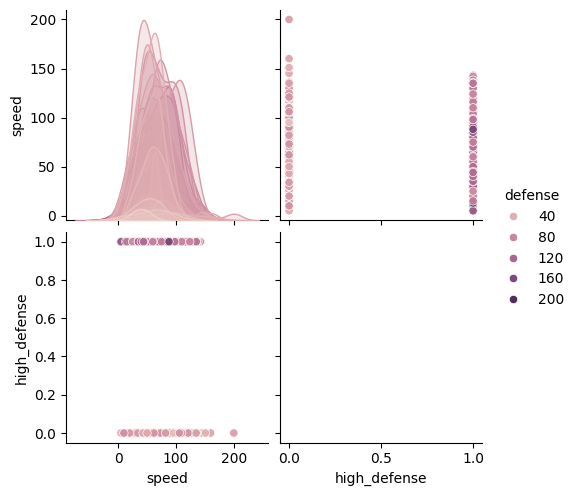

In [140]:
sns.pairplot(features_df, hue='defense')

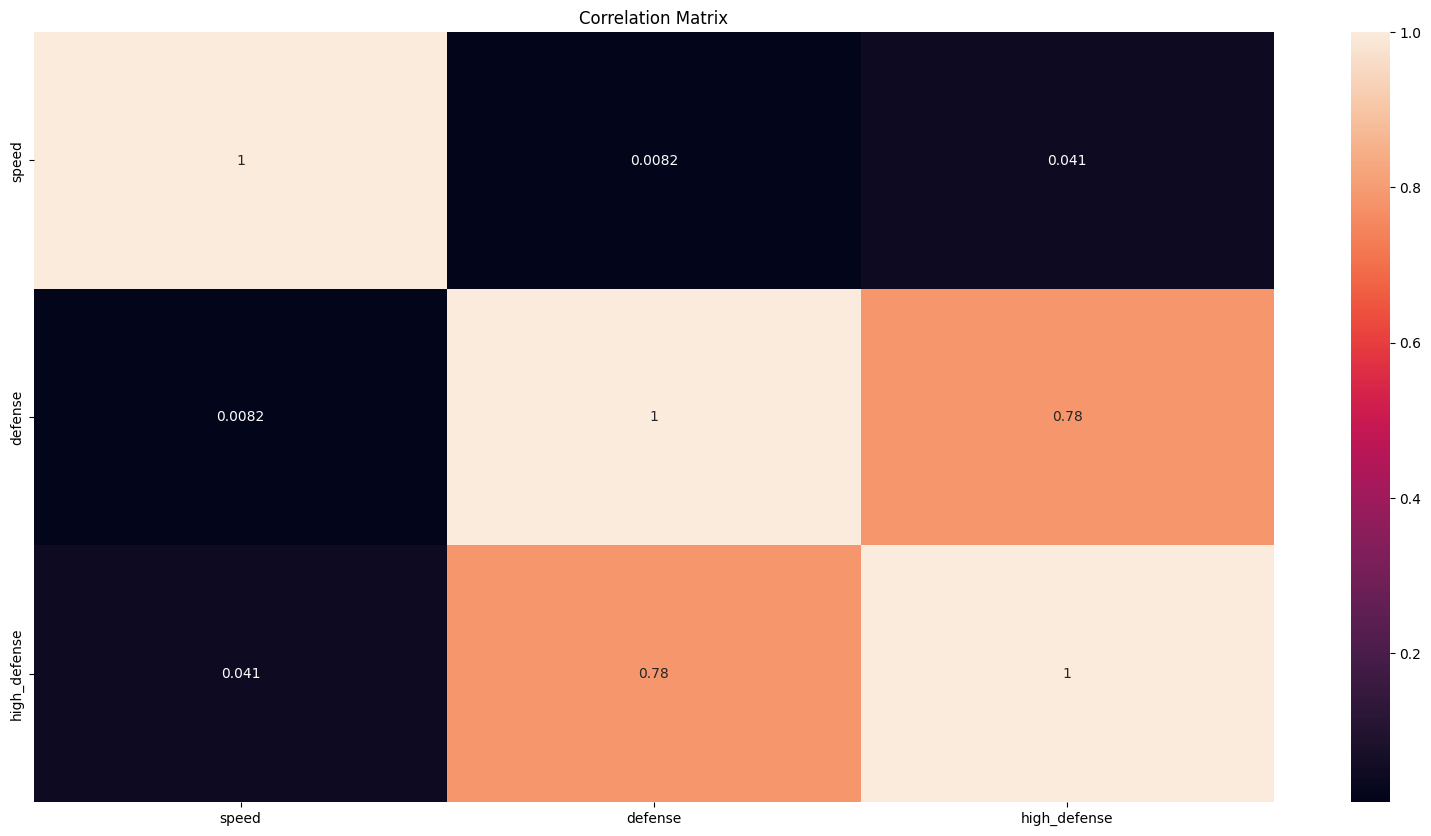

In [141]:
corr = features_df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()